# LAB Sheet-06: Density Estimation: Gaussian Mixture Models


Let's generate a sample dataset where points are generated from one of two Gaussian processes. The first distribution will have the mean of 100, the second distribution - 90; and distributions have standard deviation of 5 and 2 respectively.

We will have 60,000 points in the first process; 50,000 points in the second process and mix them together.

In [26]:
# import libraries
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

note: use seaborn for plotting histograms and density functions

In [16]:
Mean1, Mean2  = 100.0, 90.0
Standard_dev1, Standard_dev2 = 5.0, 2.0
sample1, sample2 = 60000, 50000

print('Input Normal_distb {:}: μ = {:1}, σ = {:.2}, n = {} '.format("1", Mean1, Standard_dev1, sample1))
print('Input Normal_distb {:}: μ = {:1}, σ = {:.2}, n = {} '.format("2", Mean2, Standard_dev2, sample2))

Input Normal_distb 1: μ = 100.0, σ = 5.0, n = 60000 
Input Normal_distb 2: μ = 90.0, σ = 2.0, n = 50000 


Now generate the data, store the samples and plot the histogram.

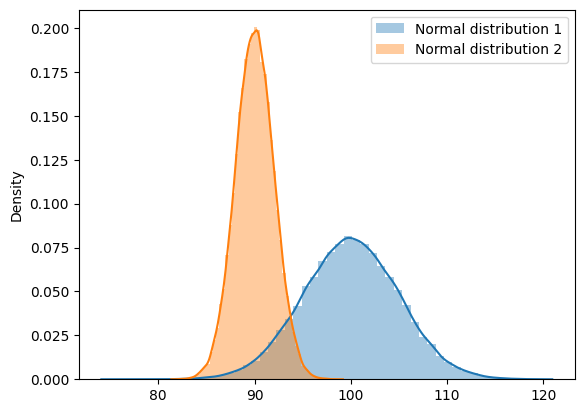

In [27]:
# Your code solution here
# generate data
Distribution1 = np.random.normal(Mean1,Standard_dev1,sample1)
Distribution2 = np.random.normal(Mean2,Standard_dev2,sample2)
sns.distplot(Distribution1,label='Normal distribution 1',kde=True)
sns.distplot(Distribution2,label='Normal distribution 2',kde=True)
plt.legend()
warnings.simplefilter(action='ignore', category=UserWarning)


Now mix the two distributions together by stacking the samples. Plot the distribution.

(hint: use $\texttt{np.hstack}$ to combine the samples).

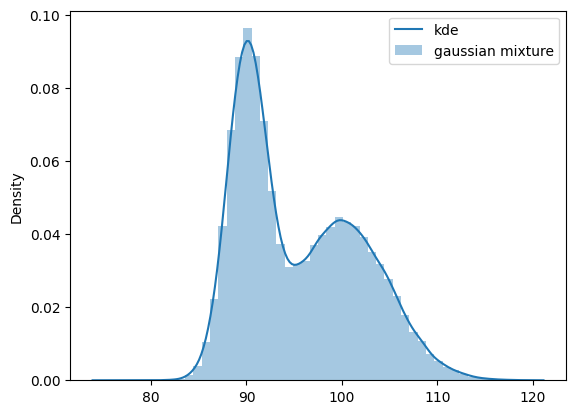

In [32]:
# Your code solution here
# mix two distrib together into a variable X
Distribution = np.hstack((Distribution2,Distribution1))
sns.distplot(Distribution,kde=True)
plt.legend(["kde","gaussian mixture"])
warnings.simplefilter(action='ignore', category=UserWarning)


So after mixing the processes together, we have the dataset that we see on the plot above. We can notice 2 peaks: around 90 and 100, but for many of the points in the middle of the peaks it is ambiguous to which distribution they were drawn from. So how can we solve this task? We can use a Gaussian Mixture Model that will estimate the parameters of the distributions using the expectation-maximization algorithm.

## **The Expectation-Maximization Algorithm**, or EM algorithm for short, is an approach for maximum likelihood estimation in the presence of latent variables.

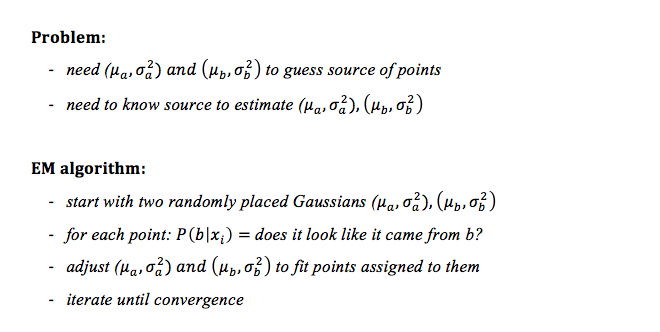

In [34]:
# reshape the data into a table with one column
X=Distribution
X = X.reshape((len(X), 1))

Fit the GMM model on the data.

(hint: use $\texttt{GaussianMixture}$ method within $\texttt{sklearn.mixture}$).

In [45]:
# Your code solution here
# fit model
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components = 2, init_params = 'random')
GMM.fit(X)
print('Converged:', GMM.converged_) # check if the model has converged

Converged: True


Now predict the posterior probability of each component given a data, eg. 105.0

In [50]:
# Your code solution here
GMM.predict_proba(np.array([[105]]))

array([[0.50067095, 0.49932905]])

Now predict the latent values. Print first 100 and last 100 latent values in the prediction.

(hint: use $\texttt{model.predict(data)}$).

In [55]:
# Your code solution here
# predict latent values
print(GMM.predict(X[0:100]))
print(GMM.predict(X[-100:-1]))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0
 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1]


Check the amount of points in each cluster by printing.

In [67]:
# Your code solution here
#check amount of points in each cluster
prediction = GMM.predict(X)
ones = prediction.sum()
zeros = prediction.size - ones

print(f'{ones = }\n{zeros = }')


ones = 75362
zeros = 34638
